<a href="https://colab.research.google.com/github/maheenna/Retrieval-Augmented-Generation/blob/main/Langchain_with_Gemini_And_Build_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q --upgrade google-generativeai langchain-google-genai chromadb pypdf langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.0/603.0 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.5/294.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 8.1 MB/s eta

In [ ]:
from IPython.display import display, Markdown
import textwrap
def to_markdown(text):
   text = text.replace('•',' *')
   return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
import google.generativeai as genai
from google.colab import userdata

In [ ]:
import os
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
genai.configure(api_key=GEMINI_API_KEY)

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    api_key=GEMINI_API_KEY,
    temperature=0.2,
)

In [ ]:
response = llm.invoke("what are the usecases of LLMs?")

In [ ]:
to_markdown(response.content)

> ## Use Cases of LLMs: A Wide Spectrum of Applications
> 
> Large Language Models (LLMs) are revolutionizing various industries and aspects of our lives. Here's a breakdown of their diverse use cases:
> 
> **1. Content Creation & Communication:**
> 
> * **Writing:** Generating articles, blog posts, social media content, marketing copy, scripts, poems, code, and more.
> * **Translation:** Translating text between languages with high accuracy.
> * **Summarization:** Condensing lengthy documents into concise summaries.
> * **Chatbots & Virtual Assistants:** Providing conversational experiences, answering questions, and automating tasks.
> * **Email & Letter Writing:** Crafting professional and personalized emails and letters.
> 
> **2. Information Retrieval & Knowledge Management:**
> 
> * **Search Engines:** Enhancing search results by understanding user intent and providing relevant information.
> * **Question Answering:** Answering complex questions based on vast knowledge bases.
> * **Data Analysis & Insights:** Extracting insights from unstructured data, identifying trends, and generating reports.
> * **Knowledge Graph Construction:** Building structured knowledge bases from text data.
> 
> **3. Education & Research:**
> 
> * **Personalized Learning:** Tailoring educational content to individual student needs.
> * **Research Assistance:** Generating research hypotheses, summarizing literature, and identifying relevant research papers.
> * **Language Learning:** Providing interactive language learning experiences.
> 
> **4. Business & Industry:**
> 
> * **Customer Service:** Automating customer support interactions and providing personalized assistance.
> * **Marketing & Sales:** Generating targeted marketing campaigns, personalizing customer interactions, and predicting customer behavior.
> * **Financial Analysis:** Analyzing financial data, identifying trends, and predicting market movements.
> * **Legal & Compliance:** Automating legal research, contract analysis, and compliance reporting.
> 
> **5. Creative & Artistic Applications:**
> 
> * **Music Composition:** Generating music scores and melodies.
> * **Art Generation:** Creating visual art, including paintings, sculptures, and digital art.
> * **Storytelling:** Generating creative narratives and scripts.
> 
> **6. Accessibility & Inclusivity:**
> 
> * **Text-to-Speech & Speech-to-Text:** Enabling communication for people with disabilities.
> * **Language Accessibility:** Breaking down language barriers and making information accessible to diverse audiences.
> 
> **7. Other Emerging Applications:**
> 
> * **Code Generation:** Automating code writing and debugging.
> * **Drug Discovery:** Identifying potential drug candidates and optimizing drug development processes.
> * **Climate Change Modeling:** Analyzing climate data and predicting future climate scenarios.
> 
> **Challenges & Considerations:**
> 
> * **Bias & Fairness:** LLMs can reflect biases present in their training data, leading to unfair or discriminatory outputs.
> * **Ethical Concerns:** LLMs raise ethical questions about authorship, plagiarism, and the potential for misuse.
> * **Transparency & Explainability:** Understanding how LLMs make decisions and ensuring their outputs are reliable and trustworthy.
> 
> **The Future of LLMs:**
> 
> LLMs are constantly evolving, with new capabilities and applications emerging regularly. As research and development continue, we can expect to see even more innovative and transformative use cases in the years to come.


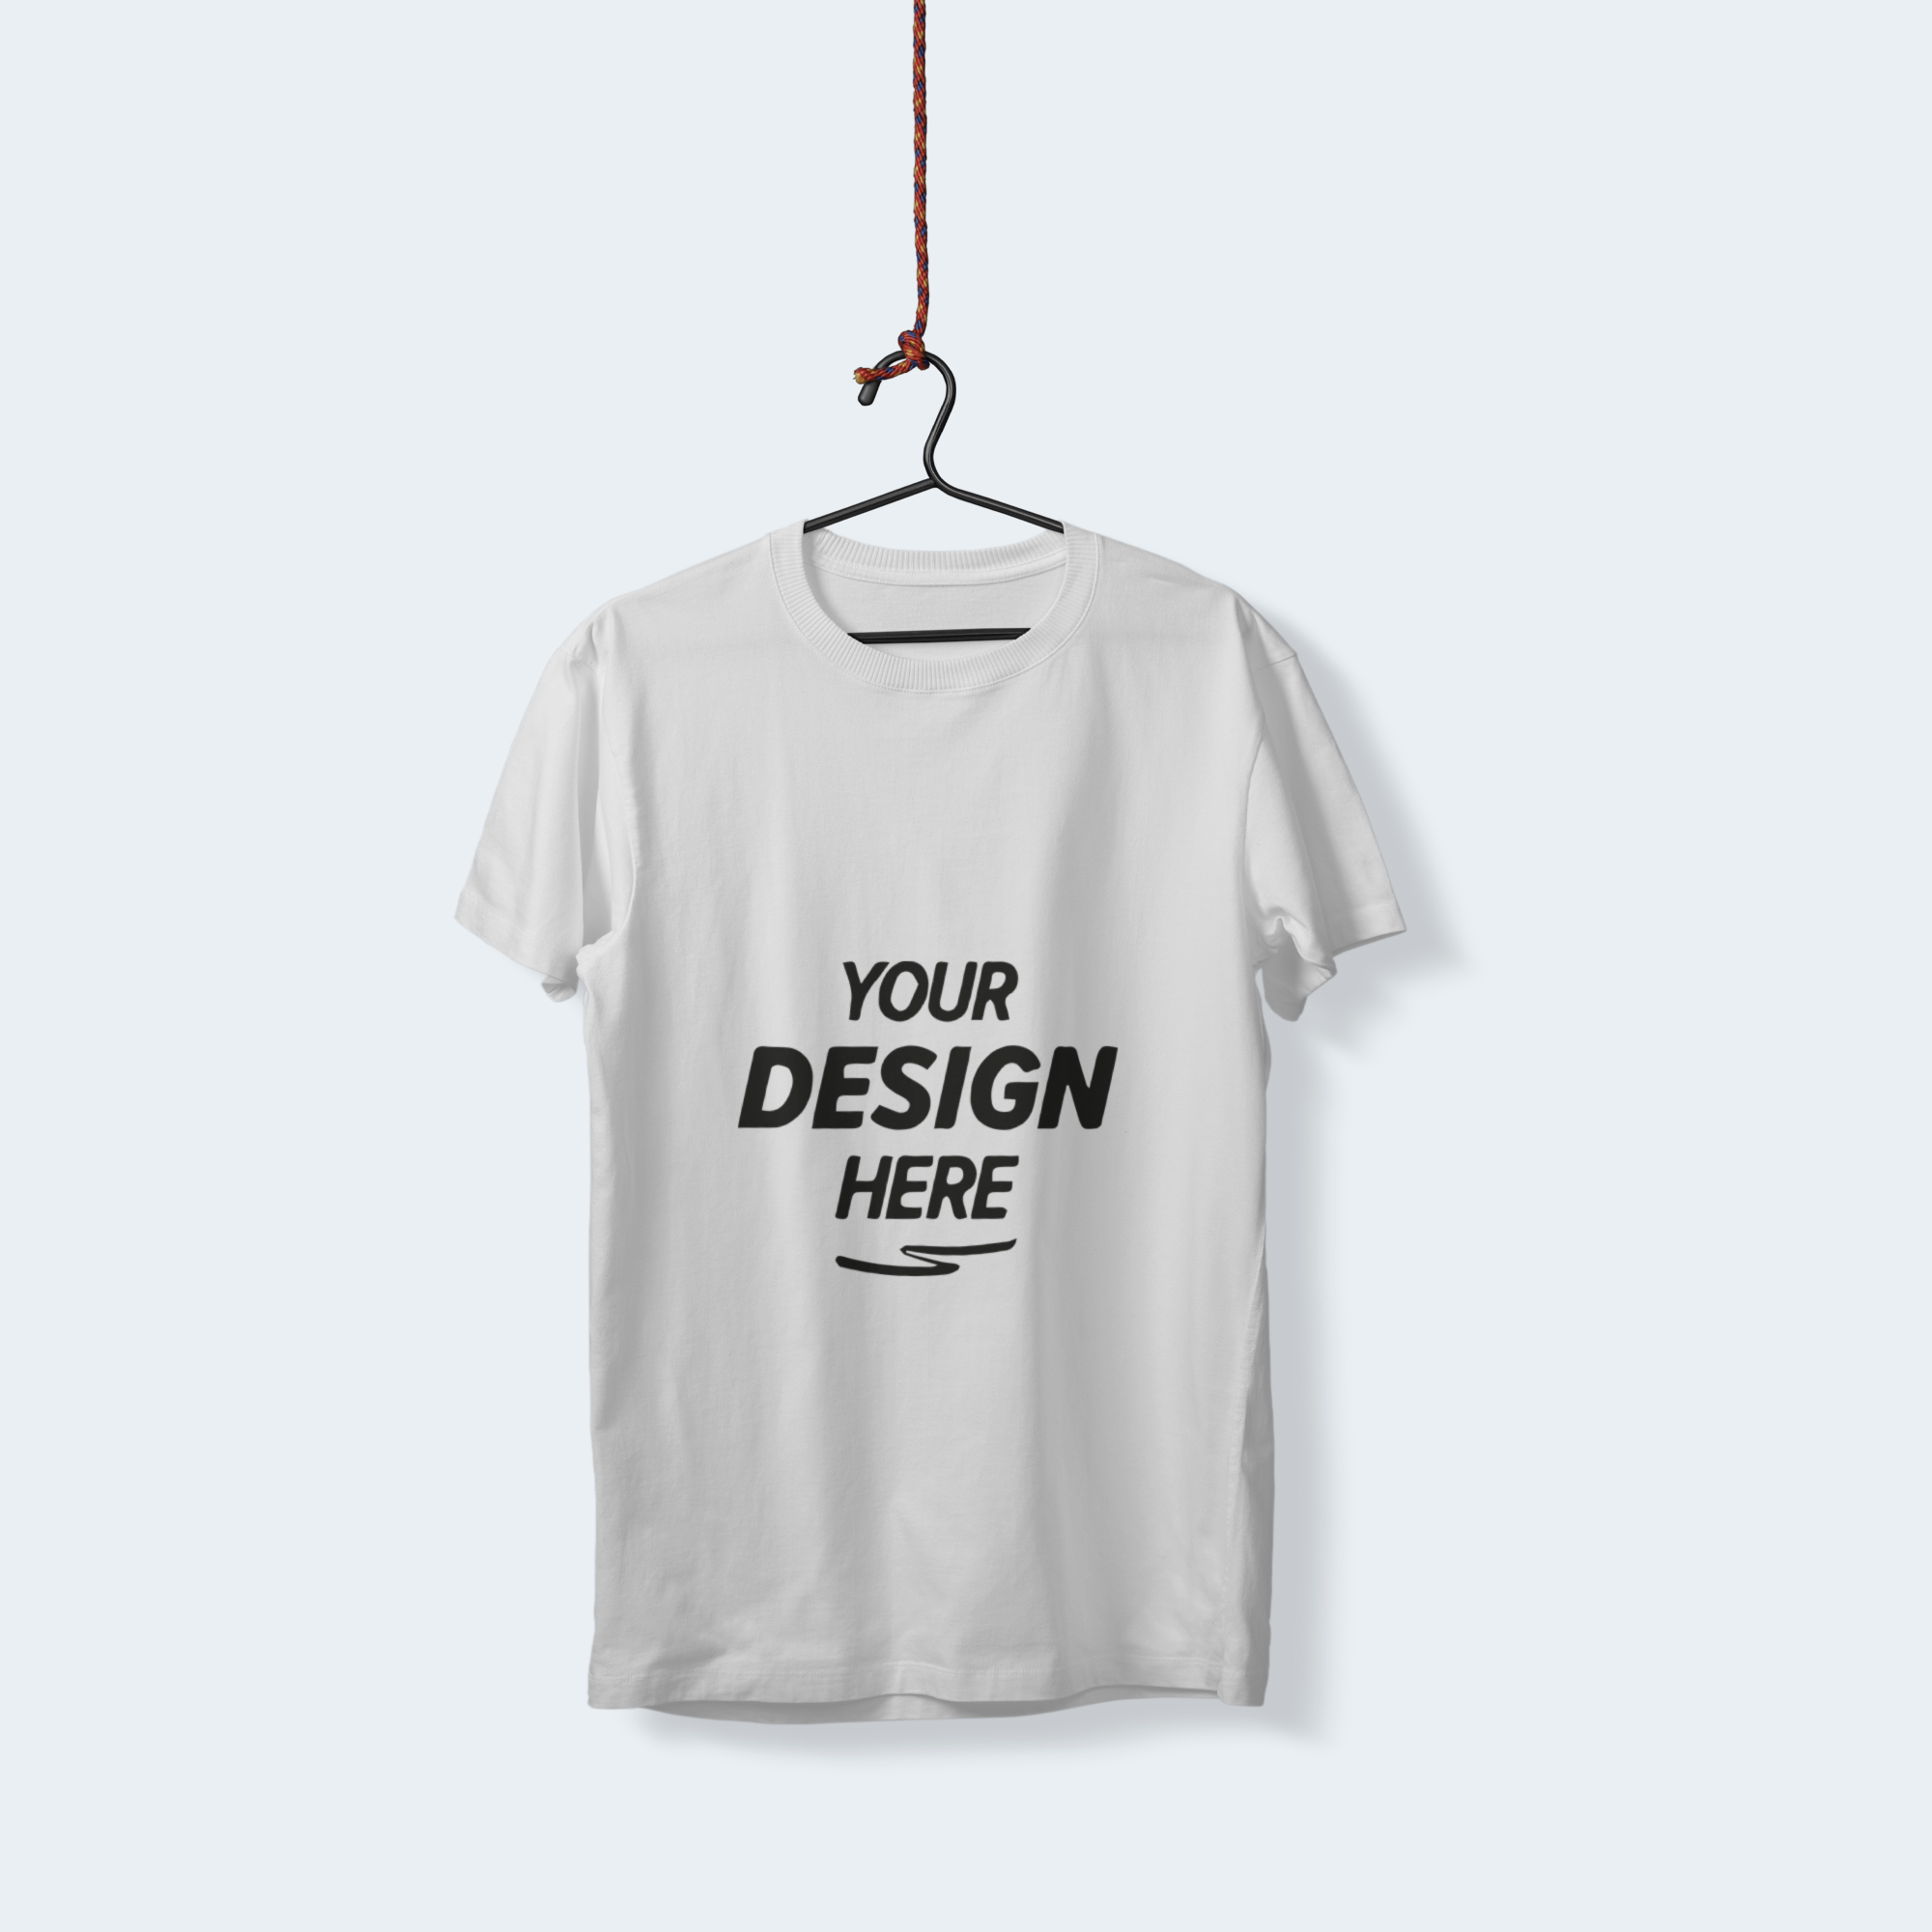

In [ ]:
import PIL.Image
img = PIL.Image.open('men-shirt.jpg')
img

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    api_key=GEMINI_API_KEY,
    temperature=0.2,
)
message = HumanMessage(
    content=[
        {
            "type":"text",
            "text":"write a short descripton about the product shown in the image for mentioning it on ecomerce store"
        },
        {"type":"image_url","image_url":"/content/men-shirt.jpg"}
    ]
)
llm.invoke([message])

AIMessage(content='This is a blank white t-shirt, perfect for customizing with your own design. Made from high-quality, soft cotton, this t-shirt is comfortable to wear and will look great with any design you choose.  Order yours today and start creating! \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-6aebc0db-7d49-4ba4-9726-0efaf024e330-0', usage_metadata={'input_tokens': 280, 'output_tokens': 52, 'total_tokens': 332})

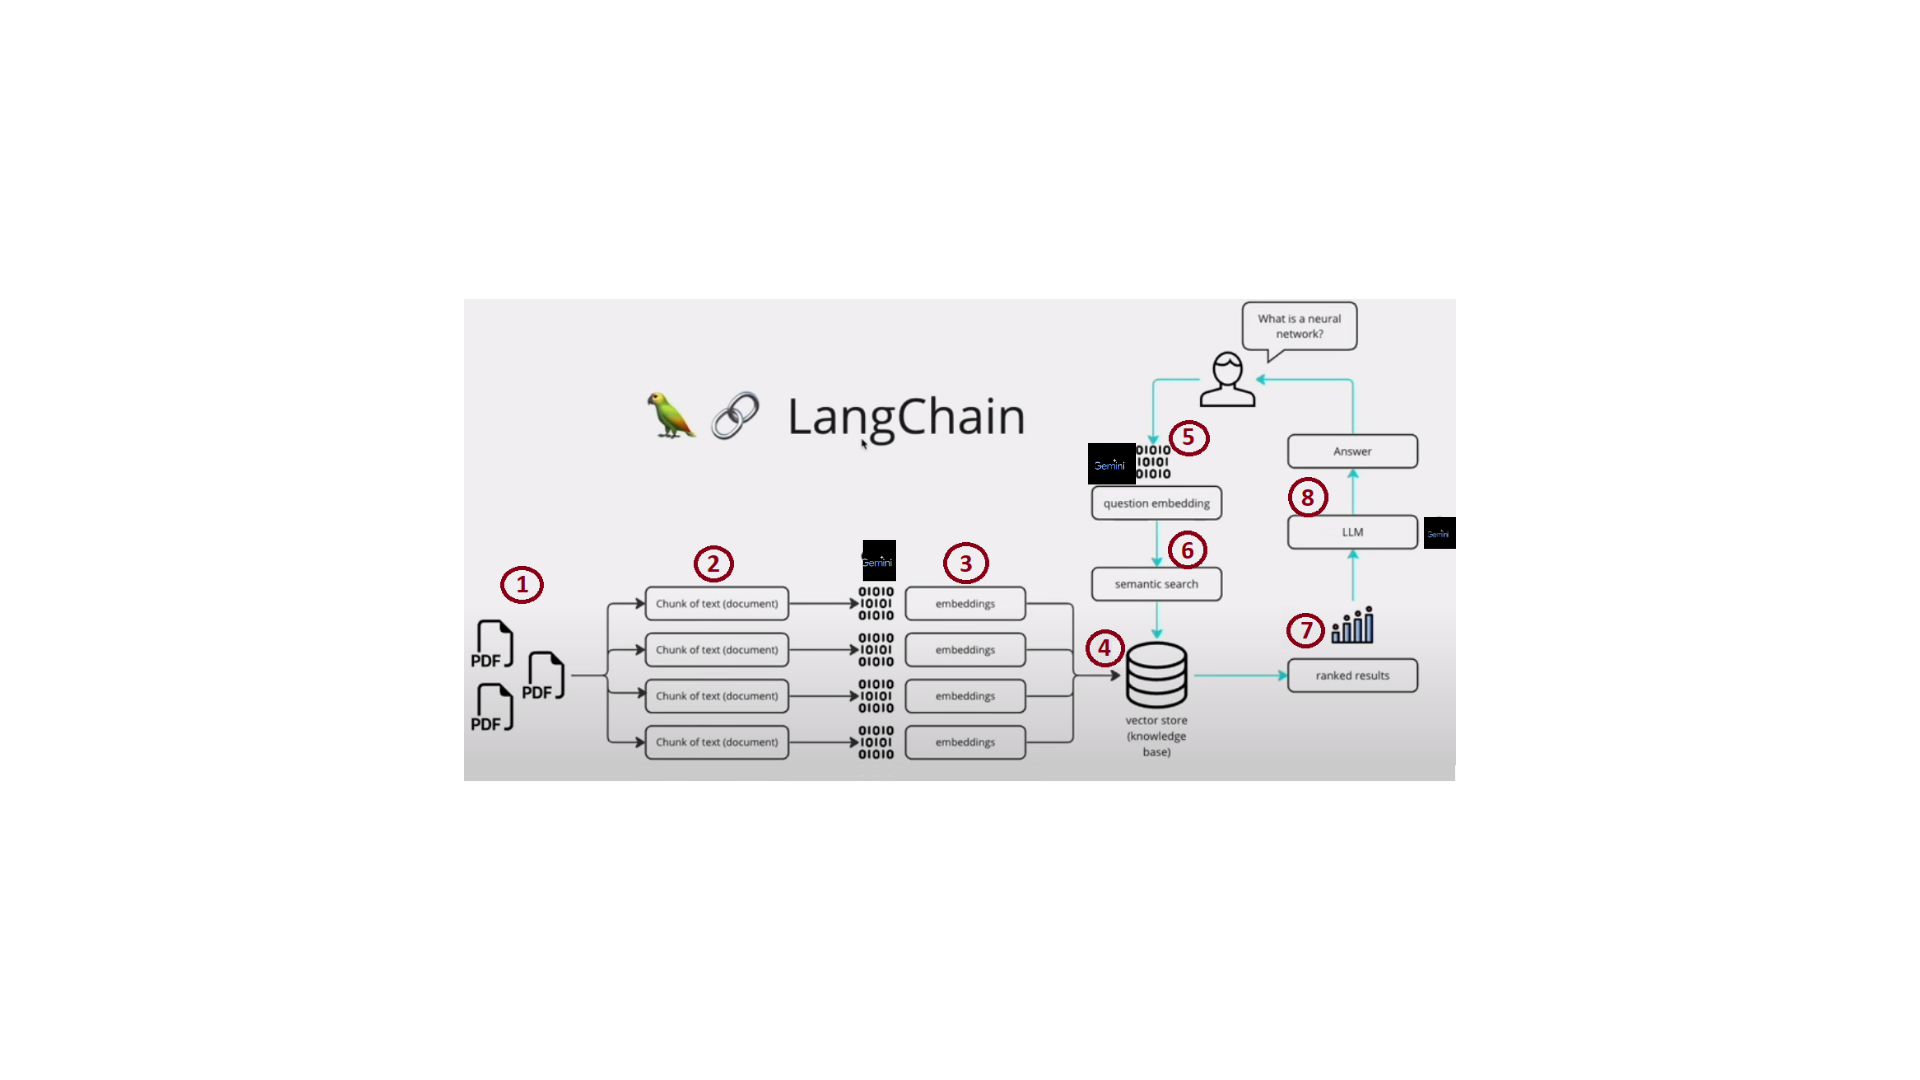

In [ ]:
import PIL.Image
img = PIL.Image.open('rag.png')
img

In [ ]:

!sudo apt -y -qq install tesseract-ocr libtesseract-dev   # tesseract-ocr is an optical character recognition for generating text from image and
#  libtesseract-dev package provides necessary libraries for developers to integrate Tesseract into other programs.

!sudo apt-get -y -qq install poppler-utils libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig

# The command installs tools for processing different file formats like
# Tesseract-OCR: Text extraction from images.
# Poppler-utils: PDF processing.
# Antiword, unrtf, pstotext: Text extraction from Word, RTF, and PostScript files.
# ffmpeg, lame, sox: Audio and media file processing.
# libxml2, libxslt1: XML and XSLT handling.
# SWIG: Interface generation between C/C++ and other languages.
# This setup supports multi-format document and media processing.

!pip install langchain

The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 123621 files and directories

In [ ]:

import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA

warnings.filterwarnings("ignore")

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash",google_api_key=GEMINI_API_KEY,
                             temperature=0.2,convert_system_message_to_human=True) # convert_system_message_to_human means convert the system generated message into human friendly language

In [ ]:
pdf_loader = PyPDFLoader("/content/attention-is-all-you-need-Paper.pdf")
pages = pdf_loader.load_and_split()
print(pages[3].page_content)

Figure 1: The Transformer - model architecture.
wise fully connected feed-forward network. We employ a residual connection [ 10] around each of
the two sub-layers, followed by layer normalization [ 1]. That is, the output of each sub-layer is
LayerNorm( x+ Sublayer( x)), where Sublayer(x)is the function implemented by the sub-layer
itself. To facilitate these residual connections, all sub-layers in the model, as well as the embedding
layers, produce outputs of dimension dmodel = 512 .
Decoder: The decoder is also composed of a stack of N= 6identical layers. In addition to the two
sub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head
attention over the output of the encoder stack. Similar to the encoder, we employ residual connections
around each of the sub-layers, followed by layer normalization. We also modify the self-attention
sub-layer in the decoder stack to prevent positions from attending to subsequent positions. This
masking, combine

In [ ]:
len(pages)

12

In [ ]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=1000)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

In [ ]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001",google_api_key=GEMINI_API_KEY)

In [ ]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={"k": 5})

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True
)
# RetrievalQA.from_chain_type builds a QA system by combining the language model (model) and the retriever (vector_index).
# The retriever fetches relevant documents or text chunks from the vector index when a question is asked.
# return_source_documents=True ensures that the source documents, from which the answer was derived, are also returned along with the answer.

In [ ]:
question = "Describe the Multi-Head Attention layer?"
result = qa_chain({"query": question})
result["result"]

'The Multi-Head Attention layer consists of multiple attention heads that run in parallel. Each head linearly projects the queries, keys, and values into different subspaces, allowing the model to attend to information from different representation subspaces at different positions. The outputs from each head are concatenated and projected again to produce the final output. \n\nThanks for asking! \n'

In [ ]:
Markdown(result["result"])

The Multi-Head Attention layer is a mechanism that allows the model to attend to information from different representation subspaces at different positions. It consists of multiple attention heads, each of which performs a scaled dot-product attention operation on a different projection of the input. The outputs of these attention heads are then concatenated and projected to produce the final output.

Here's a breakdown of how it works:

1. **Projection:** The queries, keys, and values are linearly projected h times with different, learned linear projections to dk, dk, and dv dimensions, respectively. This creates h sets of projected queries, keys, and values.
2. **Parallel Attention:** The scaled dot-product attention function is performed in parallel on each of these projected versions of queries, keys, and values. This results in h sets of dv-dimensional output values.
3. **Concatenation:** The h sets of output values are concatenated.
4. **Projection:** The concatenated output is projected to the final output dimension, dmodel.

The Multi-Head Attention layer allows the model to learn more complex relationships between the input and output sequences by attending to different aspects of the input at the same time. This is in contrast to single-head attention, which can only attend to one aspect of the input at a time.

The paper also mentions that the computational cost of Multi-Head Attention is similar to that of single-head attention with full dimensionality, due to the reduced dimension of each head.


In [ ]:
result["source_documents"]

[Document(metadata={}, page_content='Scaled Dot-Product Attention\n Multi-Head Attention\nFigure 2: (left) Scaled Dot-Product Attention. (right) Multi-Head Attention consists of several\nattention layers running in parallel.\nquery with all keys, divide each by√dk, and apply a softmax function to obtain the weights on the\nvalues.\nIn practice, we compute the attention function on a set of queries simultaneously, packed together\ninto a matrix Q. The keys and values are also packed together into matrices KandV. We compute\nthe matrix of outputs as:\nAttention(Q,K,V ) = softmax(QKT\n√dk)V (1)\nThe two most commonly used attention functions are additive attention [ 2], and dot-product (multi-\nplicative) attention. Dot-product attention is identical to our algorithm, except for the scaling factor\nof1√dk. Additive attention computes the compatibility function using a feed-forward network with\na single hidden layer. While the two are similar in theoretical complexity, dot-product attenti

In [ ]:
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)# Run chain
qa_chain = RetrievalQA.from_chain_type(
    model,
    retriever=vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)


In [ ]:
question = "Describe the Muti-head Attention layer"
result = qa_chain({"query":question})
result["result"]

'The Multi-head Attention layer consists of multiple attention heads that run in parallel. Each head performs a scaled dot-product attention operation on different, learned linear projections of the queries, keys, and values. The outputs of each head are concatenated and then projected to produce the final output. This allows the model to attend to information from different representation subspaces at different positions. \n\nThanks for asking! \n'

In [ ]:
Markdown(result["result"])

The Multi-head Attention layer consists of multiple attention heads that run in parallel. Each head performs a scaled dot-product attention operation on different, learned linear projections of the queries, keys, and values. The outputs of each head are concatenated and then projected to produce the final output. This allows the model to attend to information from different representation subspaces at different positions. 

Thanks for asking! 


In [ ]:
question = "What are forest?"
result = qa_chain({"query":question})
result["result"]

"I don't know. \nThanks for asking! \n"